In [13]:
import pandas as pd

train_data_location = "../input/bangla-bbc-news/bengali_train.jsonl"
test_data_location = "../input/bangla-bbc-news/bengali_test.jsonl"
val_data_location = "../input/bangla-bbc-news/bengali_val.jsonl"

df_train = pd.read_json(train_data_location, lines=True)
df_test = pd.read_json(test_data_location, lines=True)
df_val = pd.read_json(val_data_location, lines=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8102 entries, 0 to 8101
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       8102 non-null   object
 1   url      8102 non-null   object
 2   title    8102 non-null   object
 3   summary  8102 non-null   object
 4   text     8102 non-null   object
dtypes: object(5)
memory usage: 379.8+ KB


In [14]:
df_train = df_train.drop(columns=['id', 'url', 'title']) 
df_test = df_test.drop(columns=['id', 'url', 'title']) 
df_val = df_val.drop(columns=['id', 'url', 'title']) 

df_train

,summary,text
0,হিন্দু বাঙালীরা যে সময়ে তাদের সবথেকে বড় উৎসব...,দুর্গাপুজায় মহিষাসুর বধ্যে মধ্য দিয়ে অশুভর ও...
1,ভ্লাদিমির পুতিন তাঁর ক্ষমতায় থাকার ২০ বছর পূর...,গত ২০ বছরে তিনি রাশিয়ার প্রেসিডেন্ট এবং প্রধা...
2,বাংলাদেশের দক্ষিণাঞ্চলীয় জেলা বরিশাল এখন তুমু...,বরিশাল সদরে চলছে নির্বাচনী প্রচার প্রচারণা। যদ...
3,দু'হাজার চার সালে বিবিসি বাংলা একটি 'শ্রোতা জর...,রবীন্দ্রনাথ ঠাকুর রবীন্দ্রনাথ ঠাকুর বাঙালির কা...
4,'ভাষণ শুরু আগে মাথার উপর দিয়ে বিমান আর হেলিকপ...,আর কুমিল্লা থেকে বাস ভাড়া করে অনেকের সাথে নিজ...
...,...,...
8097,আরো পড়ুন:,ডোনাল্ড ট্রাম্প 'ডোনাল্ড ট্রাম্পের বোধশক্তি ঠি...
8098,আরো পড়ুন:,মঙ্গলগ্রহে তরল পানি থাকার প্রমাণ খুঁজে পেয়েছে...
8099,ঘটনা এক:,বরগুনায় রিফাত শরীফ নামের এক যুবককে প্রকাশ্যে ...
8100,সৌদি আরব,স্যেদি যুবরাজ মোহাম্মদ বিন সালমান ও ইরানের প্র...


In [15]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_length(data, title):

    data['News_article_text_length'] = data['text'].apply(len)
    data['News_summary_text_length'] = data['summary'].apply(len)

   
    plt.figure(figsize=(8, 4))

    
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    
    plt.subplot(1, 2, 1)
    plt.hist(data['News_article_text_length'], bins=40, color='cornflowerblue', edgecolor='black', alpha=0.7, label='Bangla News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Bangla News Article Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    
    plt.subplot(1, 2, 2)
    plt.hist(data['News_summary_text_length'], bins=40, color='firebrick', edgecolor='black', alpha=0.7, label='Bangla News Summary')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("News Summary Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    
    plt.suptitle(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')
    
    plt.tight_layout()

    # Show the plot
    plt.show()

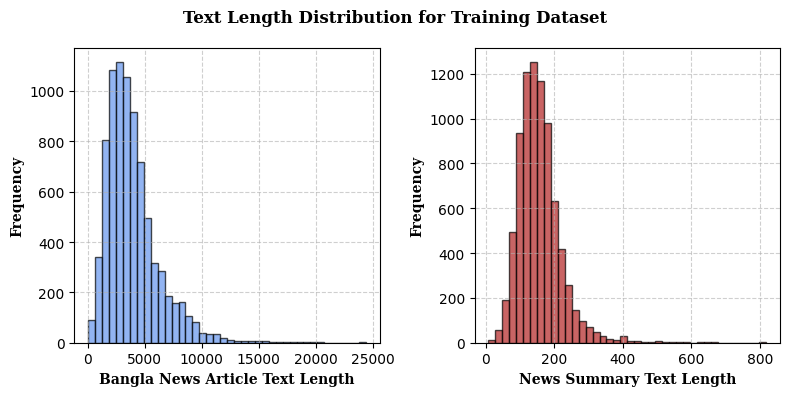

In [16]:
visualize_text_length(df_train, 'Training Dataset')

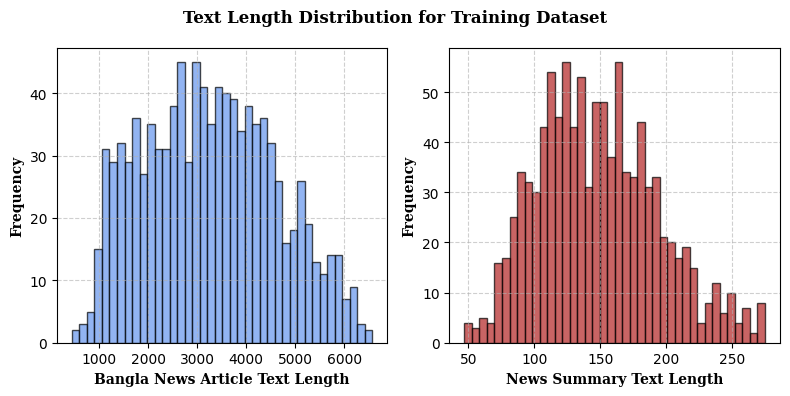

In [17]:
visualize_text_length(df_test, 'Training Dataset')

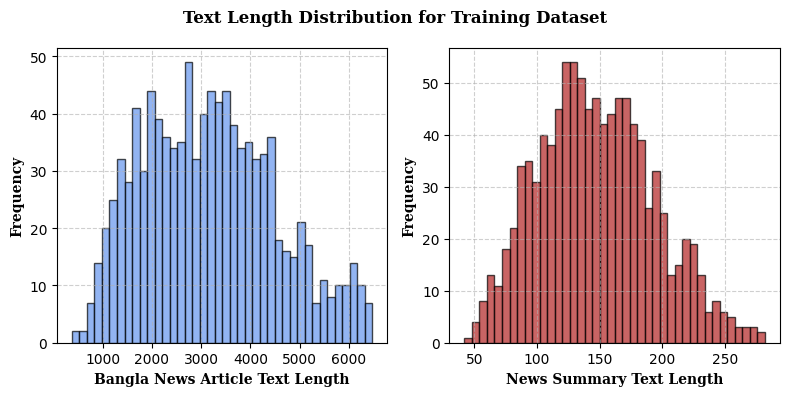

In [18]:
visualize_text_length(df_val, 'Training Dataset')

In [19]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-i_034z6z
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-i_034z6z
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
  Using cached emoji-1.4.2.tar.gz (184 kB)
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.0.3.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=40d0c83e00a3a710d0bdbb7bc5df95e1f353da00cc92f01598be8ab5378e930f
  Stored in directory: /tmp/pip-ephem-wheel-cache-uv7i03a0/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186460 sha256=b2edff384e1e2ec7f529520a63f290da48705207642203e3e69a438712571773
  Stored in directory: /root/.cache/pip/wheels/10/f0

In [20]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import torch
from normalizer import normalize
from transformers import MT5ForConditionalGeneration, AutoTokenizer ,DataCollatorForSeq2Seq, Trainer, TrainingArguments
import os

2024-03-15 09:00:45.586327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 09:00:45.586420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 09:00:45.711636: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model_name = "csebuetnlp/banglat5" 
model = MT5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

You are using a model of type t5 to instantiate a model of type mt5. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


device(type='cuda')

In [22]:
from torch.utils.data import Dataset, DataLoader
class Seq2SeqDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.input_text = data['text'].apply(normalize).tolist()
        self.labels = data['summary'].apply(normalize).tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.input_text)

    def __getitem__(self, idx):
        input_text = self.input_text[idx]
        label_text = self.labels[idx]

        
        input_encodings = self.tokenizer(
            input_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

      
        label_encodings = self.tokenizer(
            label_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': input_encodings['input_ids'].squeeze(),
            'attention_mask': input_encodings['attention_mask'].squeeze(),
            'labels': label_encodings['input_ids'].squeeze(),
        }

In [23]:
class MyDataCollatorForSeq2Seq(DataCollatorForSeq2Seq):
  def __call__(self, features):
    batch = {
      "input_ids": torch.stack([f["input_ids"] for f in features]),
      "attention_mask": torch.stack([f["attention_mask"] for f in features]),
      "labels": torch.stack([f["labels"] for f in features]) if isinstance(features[0]["labels"], torch.Tensor) else torch.tensor([f["labels"] for f in features])
    }
    return batch


In [24]:
train_dataset = Seq2SeqDataset(df_train, tokenizer)
test_dataset = Seq2SeqDataset(df_test, tokenizer)
validation_dataset = Seq2SeqDataset(df_val, tokenizer)


train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)  
test_dataloader = DataLoader(test_dataset, batch_size=16) 
validation_dataloader = DataLoader(validation_dataset, batch_size=16)


In [25]:
custom_optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-3,
    eps=1e-8,
    weight_decay=0.01,
)

training_args = TrainingArguments(
    output_dir='/kaggle/working/',
    num_train_epochs=15,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=8,
    evaluation_strategy="epoch",
    save_total_limit=1,
    save_steps=5000,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=False,
    lr_scheduler_type="cosine_with_restarts",
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='/kaggle/working/',
    logging_steps=200,
    
)


data_collator = MyDataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    padding=False,
    max_length=80,
    label_pad_token_id=tokenizer.pad_token_id,
)

In [26]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),
)

In [27]:
trainer.train()

Epoch,Training Loss,Validation Loss
0,No log,1.930310
1,15.936100,1.655133
2,15.936100,1.588899
3,1.760800,1.427115
4,1.760800,1.445868
5,1.646500,0.734708
6,1.646500,0.663675
8,0.870900,0.623593
9,0.744100,0.615540
10,0.744100,0.611008


TrainOutput(global_step=1515, training_loss=2.995482063922945, metrics={'train_runtime': 5156.9901, 'train_samples_per_second': 23.566, 'train_steps_per_second': 0.294, 'total_flos': 2.0728974573305856e+16, 'train_loss': 2.995482063922945, 'epoch': 14.94})

In [28]:
model.save_pretrained("/kaggle/working/banglat5_model.pt")
tokenizer.save_pretrained("/kaggle/working/banglat5_tokenizer.json")

('/kaggle/working/banglat5_tokenizer.json/tokenizer_config.json',
 '/kaggle/working/banglat5_tokenizer.json/special_tokens_map.json',
 '/kaggle/working/banglat5_tokenizer.json/spiece.model',
 '/kaggle/working/banglat5_tokenizer.json/added_tokens.json',
 '/kaggle/working/banglat5_tokenizer.json/tokenizer.json')

In [29]:
def summarize_text(input_text):
    
    def preprocess_input(text):
      inputs = tokenizer(text, return_tensors="pt")
      return inputs
    inputs = preprocess_input(input_text)

    with torch.no_grad():
      outputs = model.generate(**inputs)
      summary_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
      print(summary_text)

In [34]:
model = AutoModelForSeq2SeqLM.from_pretrained("/kaggle/working/banglat5_model.pt")
tokenizer = AutoTokenizer.from_pretrained("/kaggle/working/banglat5_tokenizer.json")

input_text = "summarize: যে রাজনৈতিক দল নির্বাচন ও অন্যান্য গণতান্ত্রিক প্রক্রিয়াকে ব্যবহার করে একটি দেশের গণতন্ত্রকে ধ্বংস করতে থাকে, সে দলগুলোর বিরুদ্ধে কী ব্যবস্থা নেওয়া উচিত? এই প্রশ্নের সর্বসম্মত না হলেও সুপ্রতিষ্ঠিত একটি জবাব হলো, ক্ষমতায় আসার আগেই দলটিকে নিষিদ্ধ করা উচিত। "  

summarize_text(input_text)

বাংলাদেশে গণতন্ত্রকে ধ্বংস করে এমন রাজনৈতিক দল কীভাবে ক্ষমতায় আসবে?


In [35]:
input_text = "summarize: সাতোশি নাকামোতো নামের এক লোক বিটকয়েনের ডিজাইন করেছিলেন। এটি তাঁর ছদ্মনাম। তিনিই বিটকয়েনের সৃষ্টিকর্তা। সাতোশি নাকামোতো ঠিক করেছিলেন, সর্বোচ্চ ২ কোটি ১০ লাখ বিটকয়েন সৃষ্টি করা যাবে। হাভিং করার কোডও লিখেছিলেন নাকামোতো। ঠিক করেছিলেন, নতুন বিটকয়েন তৈরি ধীরে ধীরে কমে যাবে।"  

summarize_text(input_text)

জাপানের এক ব্যক্তি বিটকয়েনের ডিজাইন করেছিলেন।


In [36]:
input_text = "summarize: বাংলাদেশ পরমাণু শক্তি কমিশনের স্বত্বাধীন প্রতিষ্ঠান নিউক্লিয়ার পাওয়ার প্ল্যান্ট কোম্পানি বাংলাদেশ লিমিটেড (এনপিসিবিএল) একাধিক পদে জনবল নিয়োগে বিজ্ঞপ্তি প্রকাশ করেছে। এ প্রতিষ্ঠানে ১০ ক্যাটাগরির পদে ৮ম, ১০ম ও ১৬তম গ্রেডে ৫৩ জনকে নিয়োগ দেওয়া হবে। আগ্রহী প্রার্থীদের অনলাইনে আবেদন করতে হবে।"  

summarize_text(input_text)

বাংলাদেশে পরমাণু শক্তি কমিশনের স্বত্বাধীন প্রতিষ্ঠান বাংলাদেশ পরমাণু শক্তি কমিশনের অধীন একটি প্রতিষ্ঠান বাংলাদেশ পরমাণু শক্তি কমিশনের অধীন


In [37]:
trainer.train()

Epoch,Training Loss,Validation Loss
0,No log,0.610807
1,0.657100,0.609256
2,0.657100,0.615802
3,0.574200,0.621960
4,0.574200,0.633551
5,0.495400,0.643128
6,0.495400,0.654157
8,0.430400,0.680119
9,0.385500,0.696184
10,0.385500,0.699924


TrainOutput(global_step=1515, training_loss=0.4508283785074064, metrics={'train_runtime': 5146.9244, 'train_samples_per_second': 23.612, 'train_steps_per_second': 0.294, 'total_flos': 2.0728974573305856e+16, 'train_loss': 0.4508283785074064, 'epoch': 14.94})

In [38]:
input_text = "summarize: বাংলাদেশ পরমাণু শক্তি কমিশনের স্বত্বাধীন প্রতিষ্ঠান নিউক্লিয়ার পাওয়ার প্ল্যান্ট কোম্পানি বাংলাদেশ লিমিটেড (এনপিসিবিএল) একাধিক পদে জনবল নিয়োগে বিজ্ঞপ্তি প্রকাশ করেছে। এ প্রতিষ্ঠানে ১০ ক্যাটাগরির পদে ৮ম, ১০ম ও ১৬তম গ্রেডে ৫৩ জনকে নিয়োগ দেওয়া হবে। আগ্রহী প্রার্থীদের অনলাইনে আবেদন করতে হবে।"  

summarize_text(input_text)

বাংলাদেশে পরমাণু শক্তি কমিশনের স্বত্বাধীন প্রতিষ্ঠান বাংলাদেশ পরমাণু শক্তি কমিশনের অধীন একটি প্রতিষ্ঠান বাংলাদেশ পরমাণু শক্তি কমিশনের অধীন


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
0,No log,0.719123
1,0.351400,0.714933
2,0.351400,0.734925
3,0.314000,0.749868
4,0.314000,0.783174


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model.push_to_hub("kawsarahmd/t5-bangla-102")

In [ ]:
tokenizer.push_to_hub("kawsarahmd/t5-bangla-102")